In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Import the dataset

df = pd.read_csv (r"C:\Users\irubinstein\OneDrive - Healthfirst\Desktop\Data Analytics\NYPD_Arrest_Data__Year_to_Date__20240501.csv")

In [3]:
# review the dataset output

df.head ()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
0,280255493,1/10/2024,397.0,"ROBBERY,OPEN AREA UNCLASSIFIED",105.0,ROBBERY,PL 1601001,F,M,26,0,<18,M,BLACK,996342,236149,40.814845,-73.956312,POINT (-73.956312 40.814845)
1,279805419,1/2/2024,157.0,RAPE 1,104.0,RAPE,PL 1303501,F,K,77,0,25-44,M,WHITE HISPANIC,1003509,185018,40.674496,-73.930571,POINT (-73.9305713255961 40.6744956865259)
2,279895750,1/3/2024,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,Q,106,0,65+,F,WHITE,1026836,180689,40.662526,-73.846499,POINT (-73.846499 40.662526)
3,280809090,1/19/2024,511.0,"CONTROLLED SUBSTANCE, POSSESSI",235.0,DANGEROUS DRUGS,PL 2200300,M,B,49,0,45-64,M,BLACK,1027430,251104,40.855793,-73.843908,POINT (-73.843908 40.855793)
4,280357135,1/11/2024,109.0,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1200502,F,K,81,2,25-44,F,BLACK,1002457,192292,40.694456,-73.934343,POINT (-73.934343 40.694456)


In [4]:
# drop columns that are insignificant for analysis

drop_cols=['ARREST_DATE', 'PD_CD', 'PD_DESC', 'KY_CD', 'LAW_CODE', 'LAW_CAT_CD', 'ARREST_PRECINCT', 'JURISDICTION_CODE', 'X_COORD_CD', 'Y_COORD_CD', 'Latitude', 'Longitude', 'New Georeferenced Column']
df.drop(drop_cols, inplace=True, axis=1)

In [5]:
# review the output

df.head()

,ARREST_KEY,OFNS_DESC,ARREST_BORO,AGE_GROUP,PERP_SEX,PERP_RACE
0,280255493,ROBBERY,M,<18,M,BLACK
1,279805419,RAPE,K,25-44,M,WHITE HISPANIC
2,279895750,ASSAULT 3 & RELATED OFFENSES,Q,65+,F,WHITE
3,280809090,DANGEROUS DRUGS,B,45-64,M,BLACK
4,280357135,FELONY ASSAULT,K,25-44,F,BLACK


In [6]:
# I am interested in analyzing NYPD arrest data in my home district of Staten Island and compare it to my former district of 
# Brooklyn. In the given dataset, Staten Island data appears under "S" in column ARREST_BORO and Brooklyn appears under "B" in
# the same column. Sorting data to only show data for Staten Island in dataframe dfsi and for Brooklyn in dataframe dfb.

dfsi = df[df['ARREST_BORO'] == 'S']

In [7]:
# Review the resulting data for Staten Island

dfsi.head ()

,ARREST_KEY,OFNS_DESC,ARREST_BORO,AGE_GROUP,PERP_SEX,PERP_RACE
30,280912825,VEHICLE AND TRAFFIC LAWS,S,18-24,M,WHITE
61,279795390,OFFENSES AGAINST PUBLIC ADMINI,S,25-44,M,WHITE
81,280511912,VEHICLE AND TRAFFIC LAWS,S,25-44,M,WHITE
100,279912066,POSSESSION OF STOLEN PROPERTY,S,25-44,M,BLACK
154,280367115,CRIMINAL MISCHIEF & RELATED OF,S,45-64,M,WHITE HISPANIC


In [8]:
dfsi.shape

(2892, 6)

In [9]:
# Review offense descriptions for Staten Island

dfsi.groupby(['OFNS_DESC']).count()

,ARREST_KEY,ARREST_BORO,AGE_GROUP,PERP_SEX,PERP_RACE
OFNS_DESC,,,,,
AGRICULTURE & MRKTS LAW-UNCLASSIFIED,1,1,1,1,1
ANTICIPATORY OFFENSES,1,1,1,1,1
ARSON,1,1,1,1,1
ASSAULT 3 & RELATED OFFENSES,342,342,342,342,342
BURGLAR'S TOOLS,5,5,5,5,5
BURGLARY,28,28,28,28,28
CANNABIS RELATED OFFENSES,1,1,1,1,1
CRIMINAL MISCHIEF & RELATED OF,153,153,153,153,153
CRIMINAL TRESPASS,33,33,33,33,33


# Conclusion
The most common offenses in Staten Island that lead to arrests are ASSAULT 3 & RELATED OFFENSES, PETIT LARCENY and VEHICLE AND TRAFFIC LAWS. Each of these categories have over 300 cases in Q1 2024.

In [10]:
# Sort data to only show data for Brooklyn in dataframe dfb.

dfb = df[df['ARREST_BORO'] == 'B']

In [11]:
# Review the resulting data for Brooklyn

dfb.head ()

,ARREST_KEY,OFNS_DESC,ARREST_BORO,AGE_GROUP,PERP_SEX,PERP_RACE
3,280809090,DANGEROUS DRUGS,B,45-64,M,BLACK
9,281426006,RAPE,B,18-24,M,BLACK
16,282248602,ASSAULT 3 & RELATED OFFENSES,B,18-24,M,BLACK
22,283166738,RAPE,B,18-24,M,WHITE HISPANIC
31,281488926,PETIT LARCENY,B,25-44,M,BLACK


In [12]:
dfb.shape

(14221, 6)

In [13]:
# Review offense descriptions for Brooklyn

dfb.groupby(['OFNS_DESC']).count()

,ARREST_KEY,ARREST_BORO,AGE_GROUP,PERP_SEX,PERP_RACE
OFNS_DESC,,,,,
(null),2,2,2,2,2
ADMINISTRATIVE CODE,2,2,2,2,2
AGRICULTURE & MRKTS LAW-UNCLASSIFIED,4,4,4,4,4
ALCOHOLIC BEVERAGE CONTROL LAW,9,9,9,9,9
ARSON,12,12,12,12,12
ASSAULT 3 & RELATED OFFENSES,2300,2300,2300,2300,2300
BURGLAR'S TOOLS,15,15,15,15,15
BURGLARY,384,384,384,384,384
CANNABIS RELATED OFFENSES,26,26,26,26,26


# Conclusion
The most common offenses in Brooklyn that lead to arrests are ASSAULT 3 & RELATED OFFENSES, FELONY ASSAULT and PETIT LARCENY. Each of these categories have over 1000 cases in each category in Q1 2024.



# Narrowing Down the Analysis

From the above analysis it is evident that ASSAULT 3 & RELATED OFFENSES is among the top 3 most common crimes in both Staten Island and Brooklyn. Staten Island had 342 out 2892 total cases attributed to ASSAULT 3, while Brooklyn had 2300 out of 14221 total cases attributed to the same category. 

I would like to compare how these two districts compare in ASSAULT 3 crime category in terms of arrested person's age. 

To ensure accurate analysis, I will have to compare the age groups proportianetly to each district's total arrested population. I am adding a column that calculates % of arrested specifically for Assault 3 & Related Offenses and grouping it by age.

In [14]:
# Narrow down dataset to show Assault 3 & Related Offenses in Staten Island only

dfsiASSAULT = dfsi[dfsi['OFNS_DESC'] == 'ASSAULT 3 & RELATED OFFENSES']

In [15]:
# Group results by age group

dfstatenisland = dfsiASSAULT.groupby(['AGE_GROUP']).count()

In [16]:
# add a column that calculates % of arrested specifically for Assault 3 & Related Offenses in Staten Island as opposed to
# 2892 total number of arrests, broken down by age group.

dfstatenisland["Percent_of_Total_Arrested_SI"] = dfstatenisland["ARREST_KEY"]/2892*100

In [17]:
# review the output

dfstatenisland.head ()

,ARREST_KEY,OFNS_DESC,ARREST_BORO,PERP_SEX,PERP_RACE,Percent_of_Total_Arrested_SI
AGE_GROUP,,,,,,
18-24,66,66,66,66,66,2.282158
25-44,181,181,181,181,181,6.258645
45-64,71,71,71,71,71,2.455048
65+,11,11,11,11,11,0.380360
<18,13,13,13,13,13,0.449516


In [18]:
# Narrow down dataset to show Assault 3 & Related Offenses in Brooklyn only

dfbASSAULT = dfb[dfb['OFNS_DESC'] == 'ASSAULT 3 & RELATED OFFENSES']

In [19]:
# Group results by age group

dfbrooklyn = dfbASSAULT.groupby(['AGE_GROUP']).count()

In [20]:
# add a column that calculates % of arrested specifically for Assault 3 & Related Offenses in Brooklyn as opposed to
# 14221 total number of arrests, broken down by age group.

dfbrooklyn["Percent_of_Total_Arrested_Brooklyn"] = dfbrooklyn["ARREST_KEY"]/14221*100

In [21]:
# review the output

dfbrooklyn.head ()

,ARREST_KEY,OFNS_DESC,ARREST_BORO,PERP_SEX,PERP_RACE,Percent_of_Total_Arrested_Brooklyn
AGE_GROUP,,,,,,
18-24,385,385,385,385,385,2.707264
25-44,1409,1409,1409,1409,1409,9.907883
45-64,382,382,382,382,382,2.686168
65+,40,40,40,40,40,0.281274
<18,84,84,84,84,84,0.590676


In [22]:
# create new dataframe with % breakdown by age for both Staten Island and Brooklyn districts

dfcombined = {'Age': ['<18', '18-24', '25-44', '45-64', '65+'],
              '% of Assault Arrests in Staten Island': [0.449516, 2.282158, 6.258645, 2.455048, 0.380360],
              '% of Assault Arrests in Brooklyn': [0.590676, 2.707264, 9.907883, 2.686168, 0.281274]}
dfcombined = pd.DataFrame (data=dfcombined)

In [23]:
dfcombined.head()

,Age,% of Assault Arrests in Staten Island,% of Assault Arrests in Brooklyn
0,<18,0.449516,0.590676
1,18-24,2.282158,2.707264
2,25-44,6.258645,9.907883
3,45-64,2.455048,2.686168
4,65+,0.380360,0.281274


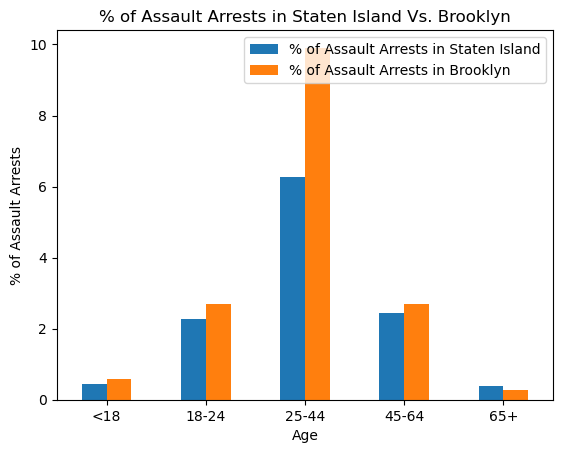

In [24]:
# plot the breakdown by age for Staten Island and Brooklyn Assault 3 arrests in a graph

dfcombined.plot.bar(x='Age', rot=0);
plt.xlabel ('Age')
plt.ylabel ('% of Assault Arrests')
plt.title ("% of Assault Arrests in Staten Island Vs. Brooklyn")
plt.legend (loc='upper right')
plt.rcParams['figure.figsize'] = (12,7)

# Conclusion

Based on the above chart, it is evident that assault arrests happen more often in Brooklyn than Staten Island for all age groups under age 65. It is also evident that for both districts had the least assault arrests for ages <18 and 65+. 

For most age groups, Brooklyn had a slightly higher % of assault arrests than Staten Island but the % for both districts were close. A glaring exception is age group 25-44. In this age group, we can observe a very sharp increase of assault arrests in Brooklyn over Staten Island. We also observe that this age group has by far the most assault arrests as compared to other age groups.

When conducting the statistical analysis on the given data, it is important to remember that there is a statistical bias in the fact that overall Brooklyn population is drastically higher than Staten Island population. According to US Census Bureau, total population of Staten Island is 492,925 people, which is only 18% of total population of Brooklyn at 2,679,620 people. The fact that Brooklyn has more assault arrests can easily be attributed to the fact that it has much larger population. If calculated per capita, Staten Island will have much higher crime rates than Brooklyn.


